In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

In [3]:
data = pd.read_csv(PATH+'complete_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

Attributes AverageBasicSharesOutstanding                                    \
Symbol                              AAPL      ABC     ABMD    ABT      ADP   
2020-09                            17.06  0.20408  0.04510  1.774  0.42860   
2020-06                            17.25  0.20365  0.04501  1.773  0.42900   
2020-03                            17.44  0.20537  0.04504  1.769  0.43000   
2019-12                            17.66  0.20601  0.04514  1.768  0.43150   
2019-09                            17.96  0.21221  0.04532  1.772  0.43270   
2019-06                            18.28  0.20970  0.04522  1.769  0.43350   
2019-03                            18.70  0.21093  0.04509  1.763  0.43410   
2018-12                            18.94  0.21205  0.04505  1.761  0.43570   
2018-09                            19.21  0.21539  0.04496  1.760  0.43680   
2018-06                            19.53  0.21857  0.04455  1.758  0.43790   
2018-03                            20.10  0.21920  0.04433  1.753  0.44100   
2017-12                            20.45  0.21832  0.04425  1.748  0.44130   
2017-09                            20.60  0.21849  0.04414  1.744  0.44220   
2017-06                            20.78  0.21868  0.04390  1.741  0.44450   
2017-03                            20.90  0.21765  0.04358  1.727  0.44650   
2016-12                            21.19  0.21866  0.04343  1.479  0.44790   
2016-09                            21.47  0.21913  0.04313  1.476  0.45230   
2016-06                            21.77  0.21569  0.04281  1.475  0.45340   
2016-03                            22.06  0.20786  0.04246  1.477  0.45440   
2015-12                            22.24  0.20618  0.04243  1.487  0.45760   
2015-09                            22.59  0.21208  0.04223  1.495  0.46240   
2015-06                            22.92  0.21936  0.04170  1.494  0.46510   
2015-03                            23.18  0.22024  0.04116  1.505  0.47030   
2014-12                            23.37  0.21946  0.04086  1.510  0.47660   
2014-09                            23.74  0.22404  0.04045  1.509  0.47840   
2014-06                            24.05  0.22573  0.04006  1.507  0.47830   
2014-03                            24.49  0.22941  0.03980  1.533  0.47890   
2013-12                            25.09  0.23028  0.03959  1.551  0.47840   
2013-09                            25.32  0.23045  0.03926  1.552  0.48010   
2013-06                            25.72  0.23100  0.03868  1.561  0.48240   
2013-03                            26.31  0.23042  0.03846  1.569  0.48270   
2012-12                            26.29  0.23236  0.03942  1.577  0.48210   
2012-09                            26.27  0.24284  0.03943  1.577  0.48350   
2012-06                            26.22  0.25212  0.03914  1.572  0.48610   
2012-03                            26.14  0.25816  0.03883  1.574  0.48850   
2011-12                            26.07  0.25846  0.03850  1.562  0.48670   
2011-09                            25.99  0.26643  0.03826  1.559  0.48790   
2011-06                            25.93  0.27349  0.03827  1.557  0.49440   
2011-03                            25.85  0.27432  0.03723  1.552  0.49620   
2010-12                            25.74  0.27560  0.03720  1.547  0.49200   
2010-09                            25.61  0.27886  0.03716  1.545  0.49140   
2010-06                            25.54  0.28120  0.03709  1.544  0.49630   
2010-03                            25.41  0.28193  0.03701  1.548  0.50240   
2009-12                            25.30  0.28696  0.03701  1.548  0.50200   
2009-09                            25.14  0.29262  0.03692  1.546  0.50140   
2009-06                            25.02  0.29848  0.03655  1.546  0.50080   
2009-03                            24.95  0.30245  0.03612  1.546  0.50120   
2008-12                            24.90  0.30859  0.03605  1.551  0.50340   
2008-09                            24.84  0.31285  0.03448  1.546  0.50750   
2008-06               

In [42]:
df = data.xs('AAPL', level='Symbol', axis=1)
df = df.sort_index()
df

Attributes  AverageBasicSharesOutstanding      Cash  CashfromFinancing  \
2000-03                             18.16   0.15912              0.030   
2000-06                             18.20   0.15666             -0.047   
2000-09                             18.31   0.06861              0.010   
2000-12                             18.88   0.06856              0.003   
2001-03                             19.38   0.06872              0.015   
2001-06                             19.53   0.06885              0.006   
2001-09                             19.65   0.06898              0.018   
2001-12                             19.67   0.06918              0.011   
2002-03                             19.79   0.15576              0.036   
2002-06                             19.96   0.06960              0.042   
2002-09                             20.09   0.06979              0.016   
2002-12                             20.11   0.07005              0.013   
2003-03                             20.19   0.15778              0.003   
2003-06                             20.20   0.10583              0.015   
2003-09                             20.28   0.10632             -0.004   
2003-12                             20.30   0.10647              0.032   
2004-03                             20.46   0.10682             -0.224   
2004-06                             21.00   0.10734              0.211   
2004-09                             21.48   0.20000              0.108   
2004-12                             22.09   0.07176              0.254   
2005-03                             22.63   0.07187              0.152   
2005-06                             22.82   0.15800              0.063   
2005-09                             23.00   0.12700              0.074   
2005-12                             23.26   0.23300              0.283   
2006-03                             23.55   0.47700             -0.141   
2006-06                             23.84   0.23500              0.129   
2006-09                             23.91   0.07080              0.053   
2006-12                             24.02   0.33400              0.188   
2007-03                             24.16   0.17600              0.180   
2007-06                             24.27   0.06910              0.229   
2007-09                             24.38   0.06858              0.142   
2007-12                             24.52   0.06741              0.485   
2008-03                             24.63   0.06613              0.077   
2008-06                             24.74   0.06513              0.354   
2008-09                             24.84   0.06433              0.200   
2008-12                             24.90   0.06253              0.062   
2009-03                             24.95   0.06027              0.074   
2009-06                             25.02   0.05927              0.208   
2009-09                             25.14   0.05895              0.319   
2009-12                             25.30   0.05858              0.523   
2010-03                             25.41   0.05802              0.162   
2010-06                             25.54   0.05749              0.316   
2010-09                             25.61   1.69000              0.256   
2010-12                             25.74   3.00000              0.429   
2011-03                             25.85   3.20300              0.547   
2011-06                             25.93   2.76900              0.037   
2011-09                             25.99   2.90300              0.431   
2011-12                             26.07   3.95600              0.069   
2012-03                             26.14   2.91100              0.310   
2012-06                             26.22   3.26900             -0.055   
2012-09                             26.27   3.10900             -2.022   
2012-12                             26.29   7.08000             -4.497   
2013-03                             26.31   5.86500             -2.248   
2013

In [43]:
# A variable for predicting 'n' periods out into the future
forecast_out = 4
tmp = df['PricePerShare']
df = df.diff()
#Create another column (the target ) shifted 'n' units up
df['PricePerShare'] = tmp
df['Prediction'] = tmp.shift(-forecast_out)
#print the new data set
#include = ['P/B', 'P/E', 'P/FCF', 'P/S', 'PEG', 'PricePerShare', 'Prediction']
exclude = ['PEG', 'P/FCF', 'P/E', 'OtherNoncashItems', 'OtherIncomeandExpenses', 'NetDebtIssuance', 'DeferredTaxes', 'ChangeinCash', 'CashfromInvesting', 'AverageBasicSharesOutstanding']
#exclude += ['TotalAssets', 'Revenue', 'RepurchaseofCapitalStock', 'PayablesandAccruedExpenses', 'P/S', 'Inventories', 'FCF', 'EndingCash', 'EPSBasic', 'EBIT', 'DividendPerShare', 'CurrentDeferredRevenue', 'CurrentDebt&CapitalLeaseObligation', 'CashfromOperations(TTM)', 'CashfromFinancing', 'Cash'] 
#exclude += ['TotalLiabilities', 'ShareholdersEquity', 'ROE']
df.drop(exclude, axis=1, errors='ignore', inplace=True)
df['Date'] = list(df.index)
df['Date'] = pd.to_datetime(df['Date']).dt.strftime("%Y%m").astype(int)
#df.drop(['PricePerShare'], axis=1, inplace=True)
df.drop('2000-03', axis=0, inplace=True)
df

Attributes      Cash  CashfromFinancing  CashfromOperations(TTM)  \
2000-06     -0.00246             -0.077                    0.146   
2000-09     -0.08805              0.057                   -0.042   
2000-12     -0.00005             -0.007                   -0.386   
2001-03      0.00016              0.012                   -0.105   
2001-06      0.00013             -0.009                   -0.267   
2001-09      0.00013              0.012                    0.075   
2001-12      0.00020             -0.007                    0.055   
2002-03      0.08658              0.025                    0.046   
2002-06     -0.08616              0.006                   -0.004   
2002-09      0.00019             -0.026                   -0.193   
2002-12      0.00026             -0.003                    0.068   
2003-03      0.08773             -0.010                    0.096   
2003-06     -0.05195              0.012                    0.045   
2003-09      0.00049             -0.019                   -0.009   
2003-12      0.00015              0.036                    0.109   
2004-03      0.00035             -0.256                   -0.037   
2004-06      0.00052              0.435                    0.203   
2004-09      0.09266             -0.103                    0.370   
2004-12     -0.12824              0.146                    0.556   
2005-03      0.00011             -0.102                    0.475   
2005-06      0.08613             -0.089                    0.261   
2005-09     -0.03100              0.011                    0.309   
2005-12      0.10600              0.209                   -0.492   
2006-03      0.24400             -0.424                   -0.661   
2006-06     -0.24200              0.270                    0.535   
2006-09     -0.16420             -0.076                    0.303   
2006-12      0.26320              0.135                    1.530   
2007-03     -0.15800             -0.008                    0.859   
2007-06     -0.10690              0.049                    0.220   
2007-09     -0.00052             -0.087                    0.641   
2007-12     -0.00117              0.343                    0.974   
2008-03     -0.00128             -0.408                    0.459   
2008-06     -0.00100              0.277                    0.094   
2008-09     -0.00080             -0.154                    2.599   
2008-12     -0.00180             -0.138                    1.151   
2009-03     -0.00226              0.012                   -0.352   
2009-06     -0.00100              0.134                    0.949   
2009-09     -0.00032              0.111                   -1.185   
2009-12     -0.00037              0.204                    1.843   
2010-03     -0.00056             -0.361                    1.489   
2010-06     -0.00053              0.154                    2.531   
2010-09      1.63251             -0.060                    2.573   
2010-12      1.31000              0.173                    3.992   
2011-03      0.20300              0.118                    3.889   
2011-06     -0.43400             -0.510                    6.309   
2011-09      0.13400              0.394                    4.747   
2011-12      1.05300             -0.362                    7.777   
2012-03     -1.04500              0.241                    7.761   
2012-06      0.35800             -0.365                   -0.920   
2012-09     -0.16000             -1.967                   -1.294   
2012-12      3.97100             -2.475                    5.880   
2013-03     -1.21500              2.249                   -1.480   
2013-06      0.33100              0.122                   -2.362   
2013-09      2.50900             -5.382                    0.772   
2013-12     -0.30100             -0.241                   -0.760   
2014-03      2.54600            -12.661                    1.040   
2014-06     -2.63300             26.397                    2.432   
2014-09      1.91300            -21.367                 

<AxesSubplot:xlabel='Attributes', ylabel='Attributes'>

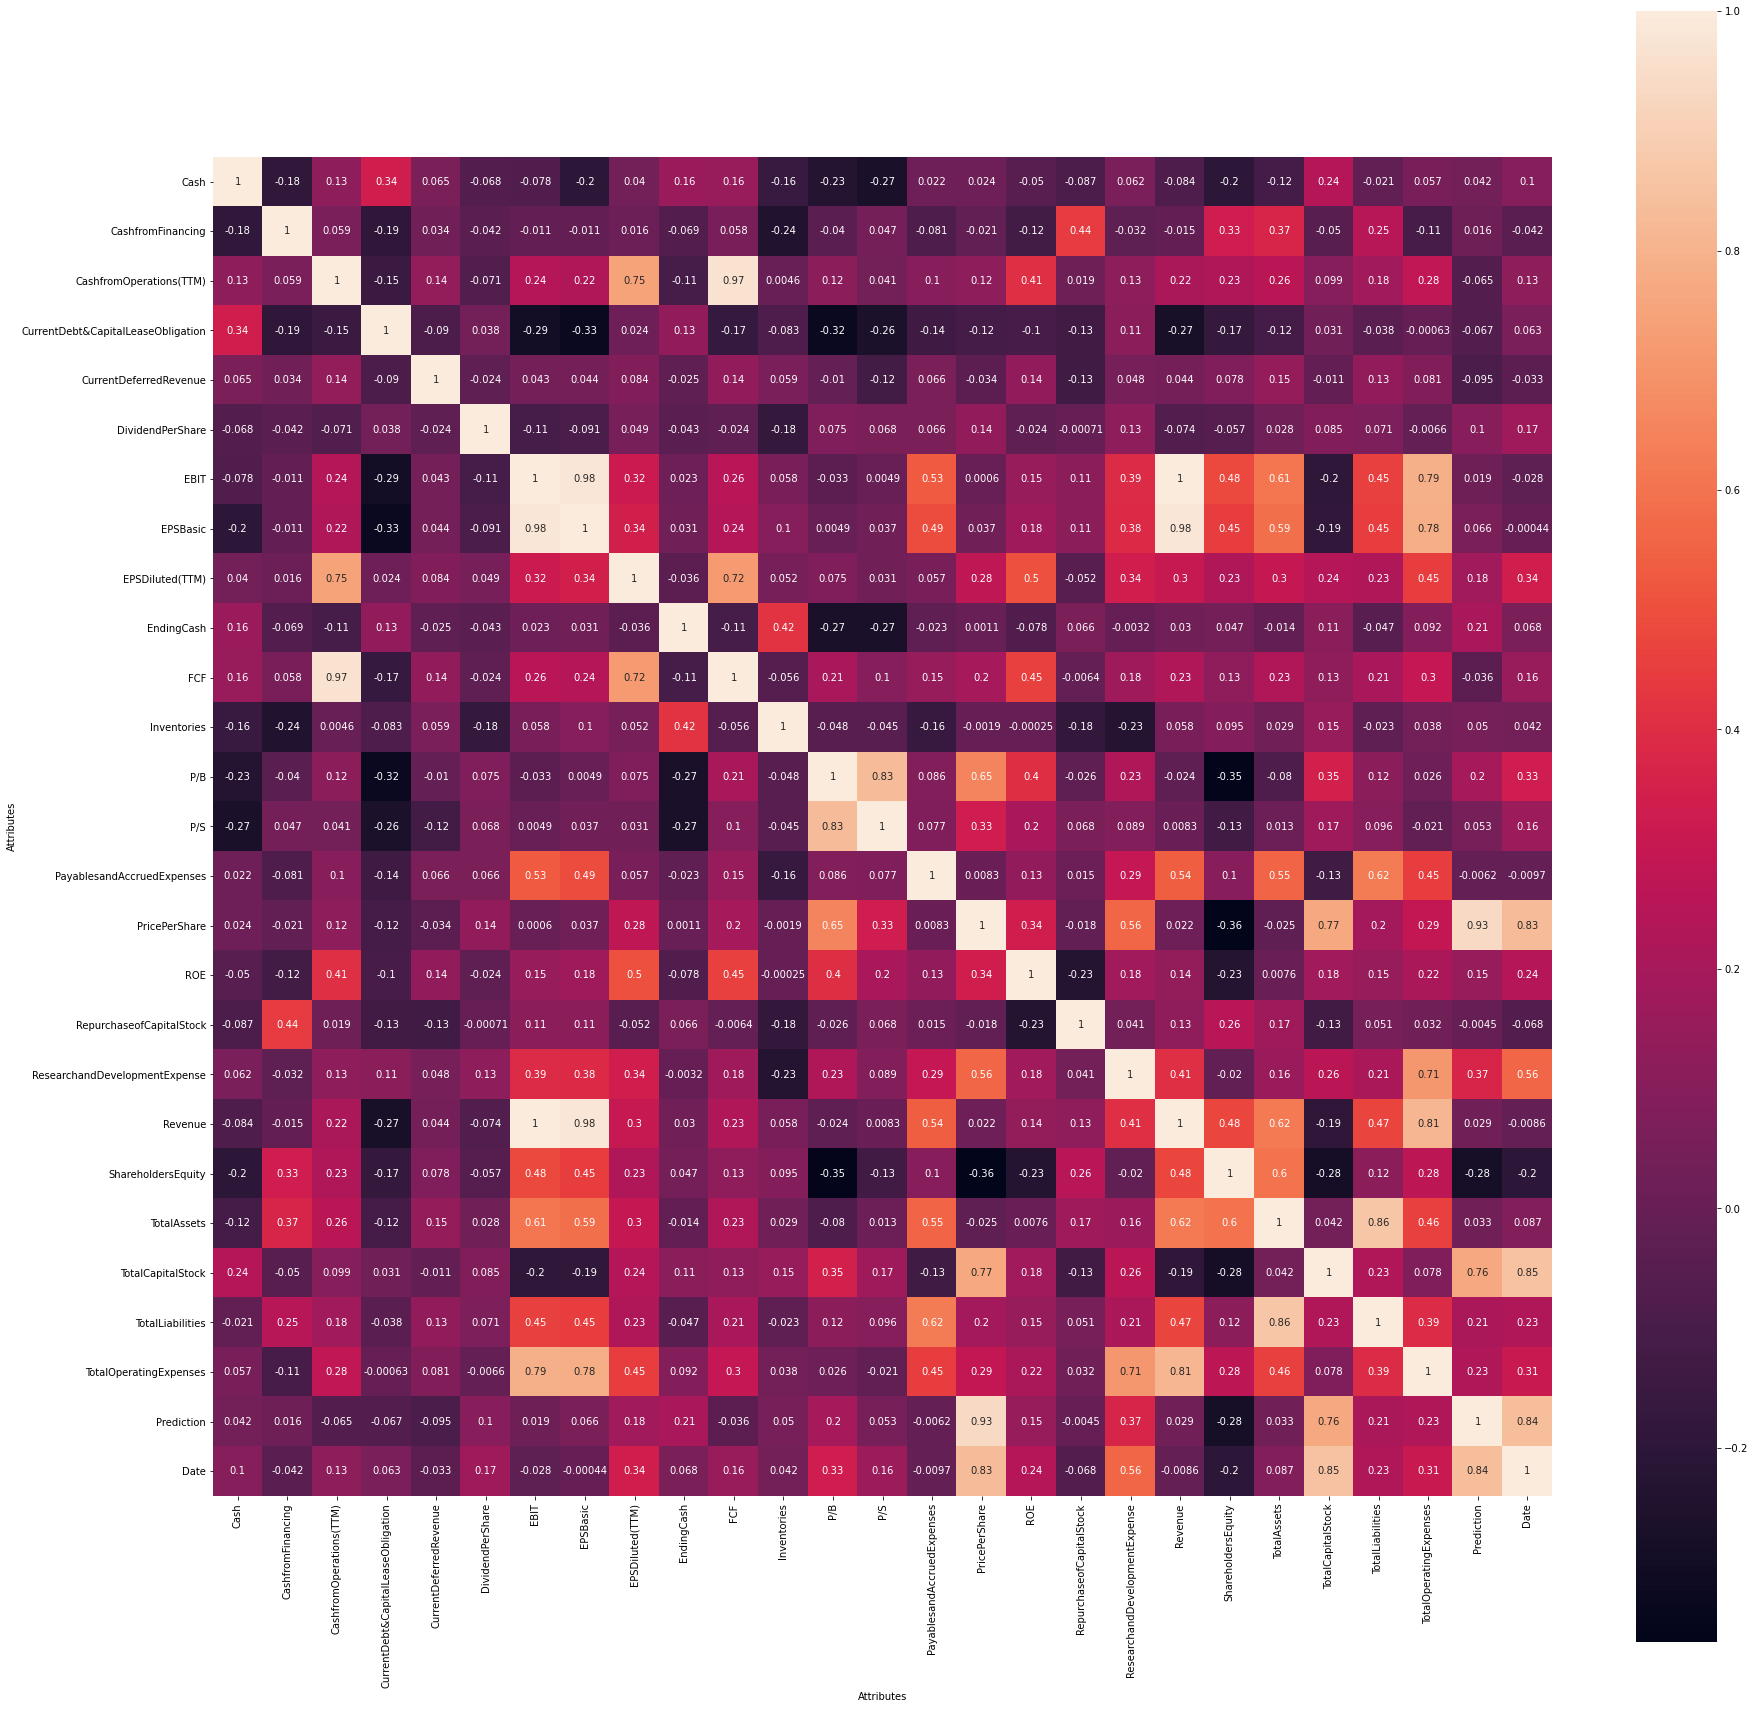

In [44]:
# Heat map of co-relation between numeric attributes
fig, ax = plt.subplots(figsize=(30,30))
sbn.heatmap(df.corr(), square=True, annot=True, ax=ax)

In [45]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
X = np.array(df.drop(['Prediction'], axis=1))

#Remove the last '30' rows
X.shape

(82, 26)

In [46]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y.shape

(82,)

In [253]:
abs_sc = MaxAbsScaler()
abs_sc.fit(X)
X_scaled = abs_sc.transform(X)
X_pred_scaled = X_scaled[-4:, :]
X_scaled = X_scaled[:-4, :]

abs_sc_predict = MaxAbsScaler()
abs_sc_predict.fit(y.reshape(y.shape[0],1))
y_scaled = abs_sc_predict.transform(y.reshape(y.shape[0],1))
y_scaled = y_scaled[:-4, :]

In [47]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_pred_scaled = X_scaled[-5:, :]
X_scaled = X_scaled[:-4, :]

sc_predict = StandardScaler()
y_scaled = sc_predict.fit_transform(df.values[:, df.columns.get_loc('Prediction'):df.columns.get_loc('Prediction')+1])
y_scaled = y_scaled[:-4, :]

In [48]:
display(X_scaled.shape, y_scaled.shape)

(78, 26)

(78, 1)

In [78]:
X_train = X_scaled[:int(X.shape[0]*0.8)]
X_test = X_scaled[int(X.shape[0]*0.8):]
y_train = y_scaled[:int(X.shape[0]*0.8)].ravel()
y_test = y_scaled[int(X.shape[0]*0.8):].ravel()

In [5]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

FCF  PricePerShare       ROE    QMonth  Prediction
1970-01  0.916929       1.150365  0.187576  0.457899  122.700371
1970-01  0.820565       1.099578  0.250438 -0.439081  118.349457
1970-01  0.703972       0.869220  0.471414 -1.336060  115.955757
1970-01  0.772199       1.305924  0.383409  1.354878  105.098518
1970-01  0.857529       1.498546  0.241106  0.457899  125.681244
1970-01  0.932745       1.319116  0.464222 -0.439081  134.759933
1970-01  0.749763       1.349112  0.528202 -1.336060  126.303001
1970-01  0.665537       0.797188  0.433829  1.354878  127.716805
1970-01  0.933664       1.473727 -0.179586  0.457899  101.703552
1970-01  0.807140       1.229987 -0.135862 -0.439081  133.590149
1970-01  1.069383       1.453363 -0.136861 -1.336060  122.102196
1970-01  0.972283       1.425745 -0.068471  1.354878  132.630325
1970-01  0.644940       1.248198  0.979759  0.457899  131.328659
1970-01  0.757855       1.376621  1.136847 -0.439081  122.960541
1970-01  0.720523       1.708043  1.226632 -1.336060  129.013351
1970-01  0.969157       1.541477  1.362827  1.354878  144.633926
1970-01  1.261192       1.391674  1.423693  0.457899  136.783325
1970-01  1.255123       1.246655  1.710225 -0.439081  129.722809
1970-01  1.329603       1.216120  2.067224 -1.336060  122.887802
1970-01  1.000420       0.957140  1.945897  1.354878  121.448616
1970-01  1.102118       1.058240  1.955174  0.457899  109.242401
1970-01  1.025615       1.331061  1.334657 -0.439081  114.007423
1970-01  0.973939       1.275368  1.134573 -1.336060  126.866035
1970-01  0.923366       1.256027  1.381231  1.354878  124.241081
1970-01  0.987363       1.714316  1.509890  0.457899  123.329521
1970-01  0.967134       1.558393  1.934168 -0.439081  144.929581
1970-01  0.896700       1.721129  1.847567 -1.336060  137.580627
1970-01  1.044740       1.625986  1.340186  1.354878  145.250687
1970-01  1.014213       1.572181  1.533943  0.457899  140.766388
1970-01  1.155265       1.651043  1.629093 -0.439081  138.230453
1970-01  1.320592       1.985052  1.687349 -1.336060  141.947418
1970-01  1.325006       1.631299  1.559534  1.354878  157.689911
1970-01  1.457966       1.865534  1.290282  0.457899  141.016815
1970-01  1.482425       1.668006  1.381254 -0.439081  152.056793
1970-01  1.482609       1.856921  1.310841 -1.336060  142.746872
1970-01  1.382015       1.463946  1.359504  1.354878  151.650833
1970-01  1.307903       1.314787  1.265049  0.457899  133.129135
1970-01  1.200137       1.252612  1.129189 -0.439081  126.098991
1970-01  1.148461       1.112375  1.078467 -1.336060  123.168564
1970-01  1.311397       0.856249  1.246531  1.354878  116.558899
1970-01  1.212274       0.656650  1.414403  0.457899  104.487190
1970-01  1.445093       0.487180  1.562576 -0.439081   95.079712
1970-01  1.643890       0.548775  1.441510 -1.336060   87.092262
1970-01  1.660993       0.579551  0.634759  1.354878   89.995323
1970-01  1.711014       0.404289  0.715488  0.457899   91.445862
1970-01  1.414565       0.172994  0.766317 -0.439081   83.185410
1970-01  1.268364       0.055005  0.806435 -1.336060   72.284058
1970-01  1.151403      -0.137647  1.284024  1.354878   66.722969
1970-01  0.772567       0.329553  0.640148  0.457899   57.642910
1970-01  0.878310       0.345595  0.195534 -0.439081   79.662956
1970-01  0.740936       0.290048  0.106943 -1.336060   80.419060
1970-01  0.536990       0.183216 -0.060032  1.354878   77.801025
1970-01  0.602826       0.315805  0.069663  0.457899   72.765831
1970-01  0.521910       0.131922  0.168876 -0.439081   79.014992
1970-01  0.356767      -0.029113 -0.115206 -1.336060   70.348244
1970-01  0.402558       0.007589 -0.090956  1.354878   62.758339
1970-01  0.459935      -0.210359 -0.226097  0.457899   64.488174
1970-01  0.552437      -0.286520 -0.288634 -0.439081   54.215839
1970-01  0.666456      -0.211673 -0.322595 -1.336060   50.626255
1970-01  0.481084      -0.218303 -0.333694  1.354878   54.153934
1970-01  0.011217      -0.248486 -0.320598  0.457

In [6]:
X_scaled = np.array(data.drop(['Prediction'], axis=1))
y_scaled = np.array(data['Prediction'])

In [7]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
svr = GridSearchCV(SVR(),
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 2, 3, 4, 5],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]})

In [8]:
svr = GridSearchCV(SVR(),
                   param_grid={"kernel": ['linear', 'poly', 'rbf'],
                               "degree": [1, 2, 3, 4, 5, 6],
                               "C": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30],
                               "gamma": [0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.009, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4]})

In [70]:
# Create and train the Support Vector Machine (Regressor) 
#svr = svr = SVR(kernel='rbf', C=14.0, gamma=0.03, epsilon=0.4)
#svr = SVR(kernel='rbf', C=200, gamma=0.98, epsilon=0.05)
svr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30],
                         'epsilon': [0.0001, 0.0003, 0.0005, 0.0008, 0.01, 0.1,
                                     0.2, 0.3, 0.4],
                         'gamma': [0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4],
                         'kernel': ['rbf']})

In [9]:
HOLDOUT = 10
params = dict()
for i in range(HOLDOUT):
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=i)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    # Train model
    svr.fit(X_train, y_train)
    # Get best params
    param = str(svr.best_params_)
    if param in list(params.keys()):
        params[param]['count'] += 1
        params[param]['train_score'].append(svr.score(X_train, y_train))
        params[param]['test_score'].append(svr.score(X_test, y_test))
        params[param]['random_seeds'].append(i)
    else:
        params[param] = {'count':1, 'train_score':[svr.score(X_train, y_train)], 'test_score':[svr.score(X_test, y_test)], 'random_seeds':[i]}
for key in (params.keys()):
    print('Params:{}\nCount:{}\nTrain_Score:{}\nTest_Score:{}\nRandom_Seeds:{}\n\n'.format(key,params[key]['count'], np.mean(params[key]['train_score']), np.mean(params[key]['test_score']), str(params[key]['random_seeds'])))

KeyboardInterrupt: 

In [39]:
#PricePerShare not change
#Params={'C': 28, 'epsilon': 0.2, 'gamma': 0.001, 'kernel': 'rbf', 'rs': [6]}
#Params={'C': 24, 'epsilon': 0.2, 'gamma': 0.0008, 'kernel': 'rbf', 'rs': [7,8]}
#Params={'C': 14, 'epsilon': 0.009, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [0]}
#Params={'C': 10, 'epsilon': 0.0001, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [2]}
#Params={'C': 14, 'epsilon': 0.0008, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [6]}
#Params={'C': 10, 'epsilon': 0.009, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [7]}
#Params={'C': 26, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [0]}
#Change on PricePerShare
#Params={'C': 16, 'epsilon': 0.0001, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [4,5]}
#Params={'C': 18, 'epsilon': 0.02, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [2]}
#Params={'C': 22, 'epsilon': 0.0001, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [0]}
#Attributes purge v2
#Params={'C': 10, 'epsilon': 0.0001, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [7]} #RMSE 0.3418819381313048
#Params={'C': 19, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [2]} #RMSE 0.30821083177031655
#Params={'C': 24, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [3]} #0.2826582408803831
#Params={'C': 24, 'epsilon': 0.0008, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [5]} #RMSE 0.3447819979625779
#Params={'C': 26, 'epsilon': 0.0003, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [6]} #RMSE 0.2823722686801121
#Params={'C': 11, 'epsilon': 0.02, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [7]} #RMSE 0.330777232907352
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=Params['rs'][0])
y_train = y_train.ravel()
y_test = y_test.ravel()
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
svr.fit(X_train, y_train)

SVR(C=11, epsilon=0.02, gamma=0.01)

In [32]:
[svr.score(X_train, y_train)]

[0.8977360851186974]

In [33]:
svr.score(X_test, y_test)

0.8164145230325778

In [149]:
#abs_sc_predict.inverse_transform(svr.predict(X_pred_scaled).reshape(1,-1))
sc_predict.inverse_transform(svr.predict(X_scaled[-1:, :]))

array([71.34155587])

In [166]:
#abs_sc_predict.inverse_transform(y_scaled[-1:, :])
sc_predict.inverse_transform(y_scaled[-1:, :])

array([[115.6105423]])

In [246]:
X_pred_scaled[:,-1]

array([1.53023942, 1.68216111, 1.68716952, 1.69217793])

In [247]:
X_scaled[:,-1]

array([-1.65677714, -1.65176873, -1.64676032, -1.64175192, -1.48983023,
       -1.48482182, -1.47981341, -1.474805  , -1.32288331, -1.31787491,
       -1.3128665 , -1.30785809, -1.1559364 , -1.15092799, -1.14591959,
       -1.14091118, -0.98898949, -0.98398108, -0.97897267, -0.97396427,
       -0.82204258, -0.81703417, -0.81202576, -0.80701735, -0.65509566,
       -0.65008726, -0.64507885, -0.64007044, -0.48814875, -0.48314034,
       -0.47813193, -0.47312353, -0.32120184, -0.31619343, -0.31118502,
       -0.30617661, -0.15425492, -0.14924652, -0.14423811, -0.1392297 ,
        0.01269199,  0.0177004 ,  0.0227088 ,  0.02771721,  0.1796389 ,
        0.18464731,  0.18965572,  0.19466412,  0.34658581,  0.35159422,
        0.35660263,  0.36161104,  0.51353273,  0.51854113,  0.52354954,
        0.52855795,  0.68047964,  0.68548805,  0.69049645,  0.69550486,
        0.84742655,  0.85243496,  0.85744337,  0.86245177,  1.01437346,
        1.01938187,  1.02439028,  1.02939869,  1.18132038,  1.18

In [40]:
PRED_TRAIN = sc_predict.inverse_transform(svr.predict(X_scaled))
PRED_FUTURE = sc_predict.inverse_transform(svr.predict(X_pred_scaled))

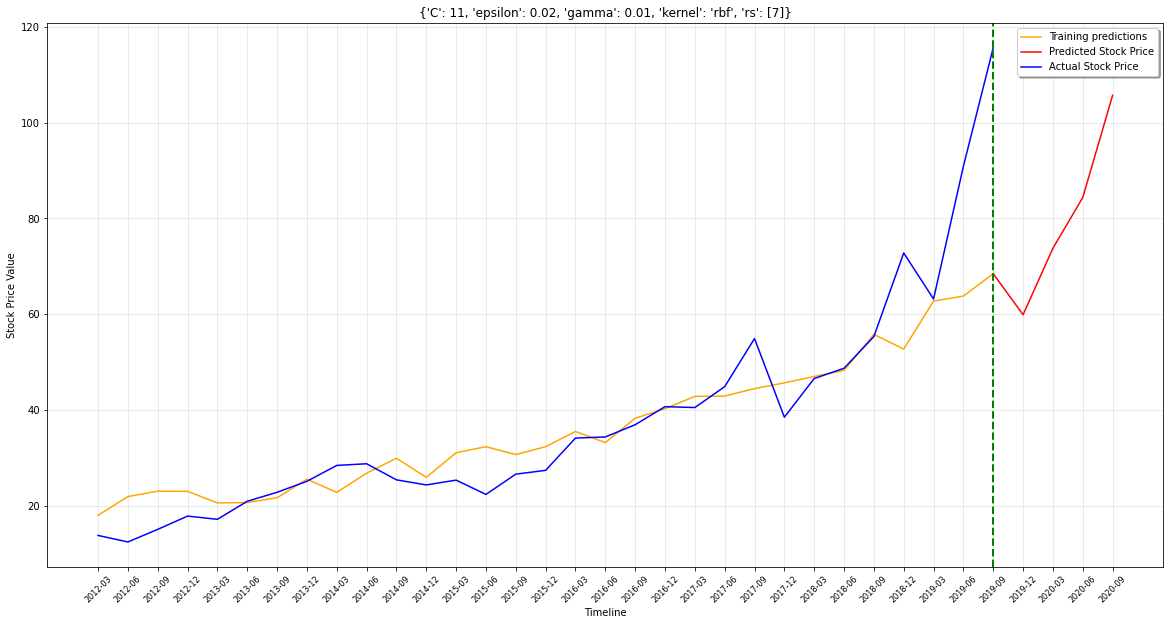

RMSE 0.330777232907352


In [41]:
params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2
# TSCO

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, svr.predict(X_scaled), squared=False))

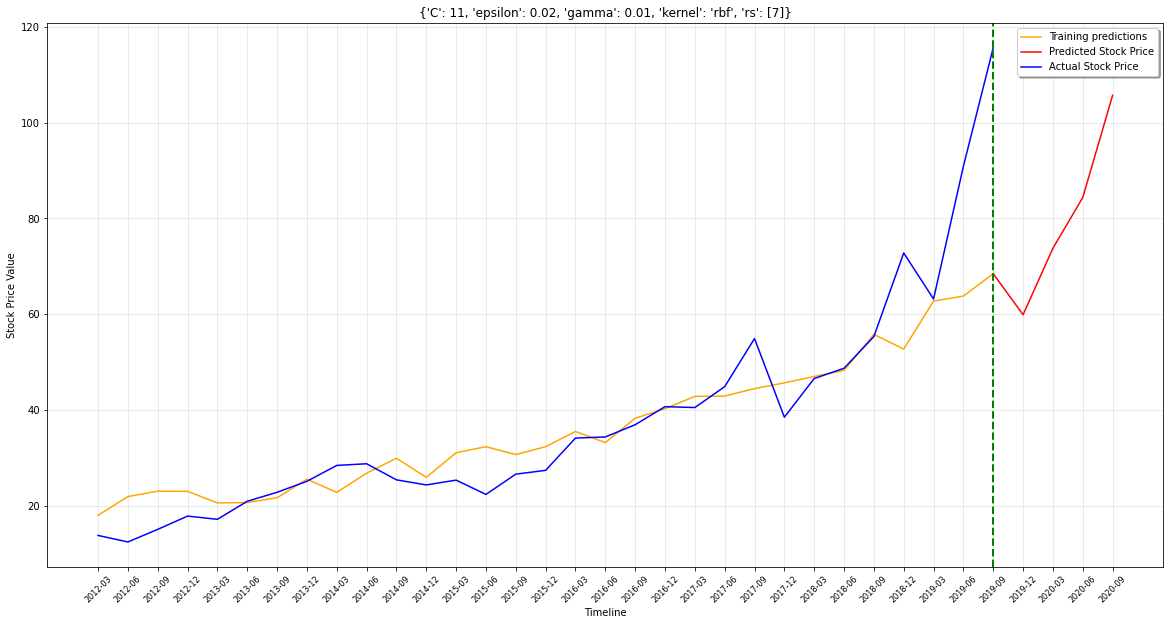

RMSE 24.411664516619624


In [160]:
params = str(Params)
# Change on attributes and no change on PricePerShare
# Reduced attributes v2

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

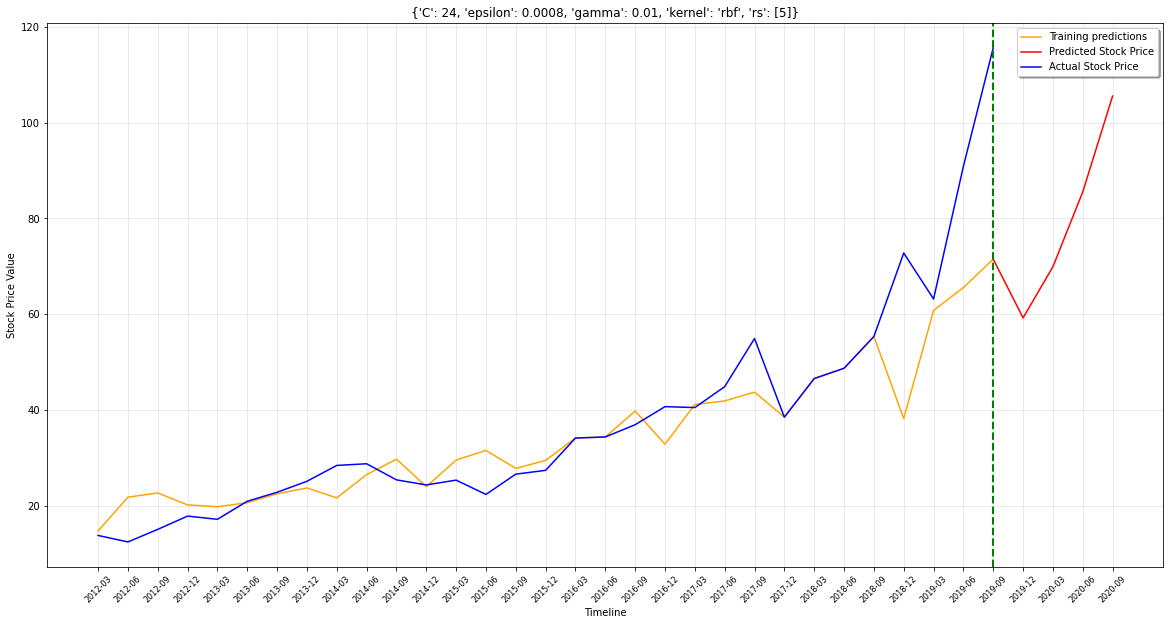

RMSE 23.55656830069712


In [150]:
params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

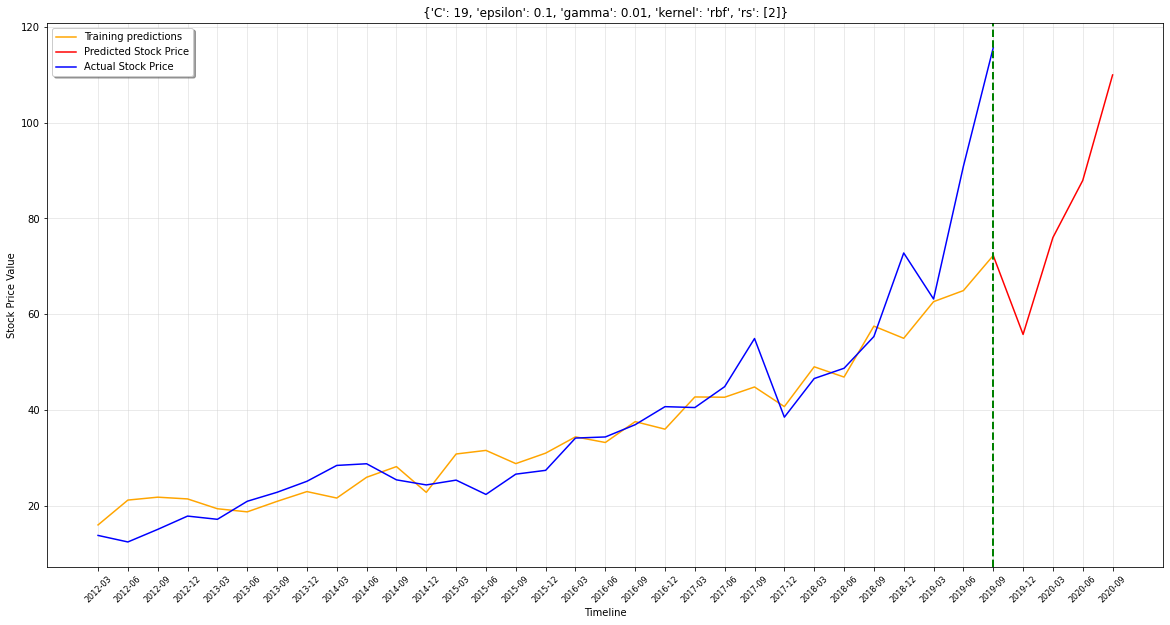

RMSE 24.06882407233554


In [140]:
params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

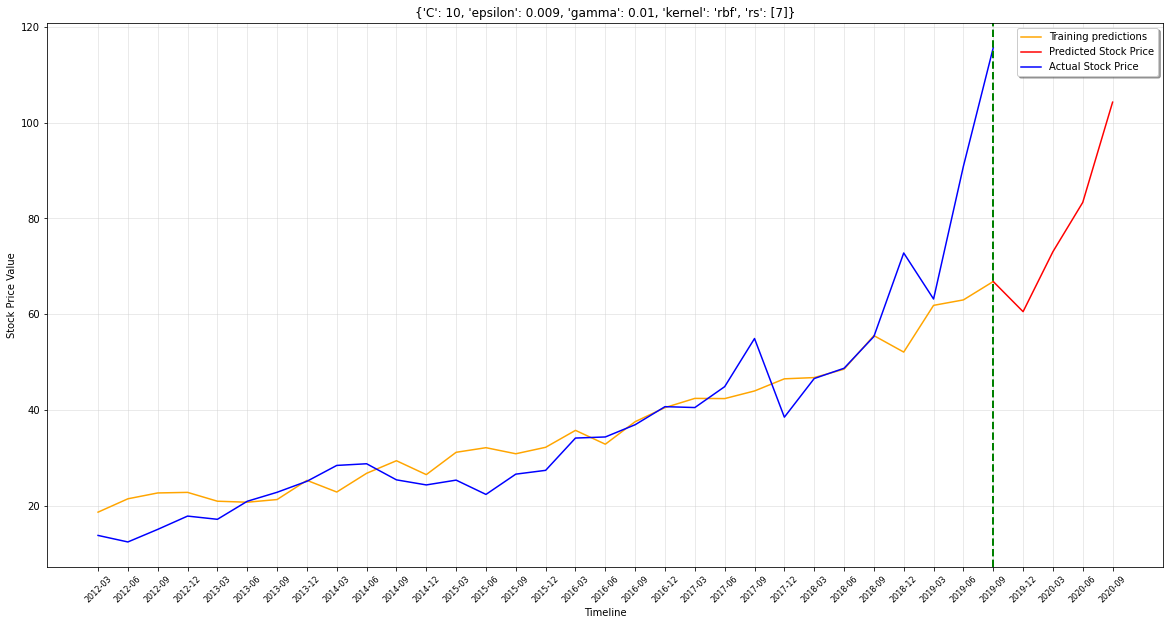

RMSE 24.254090720080118


In [122]:
params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

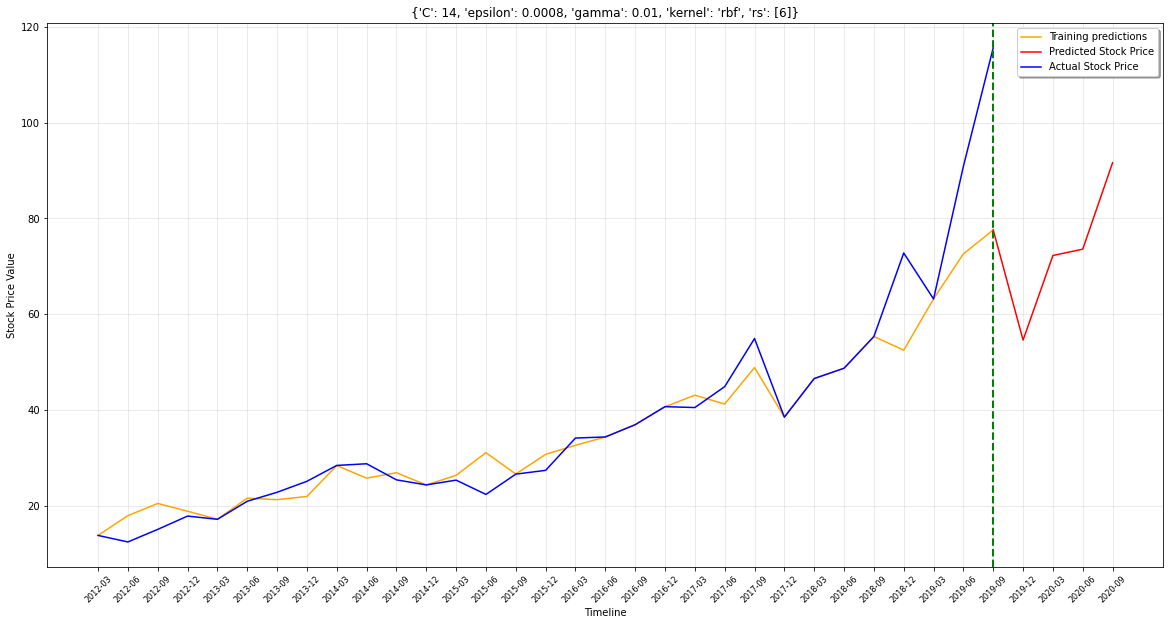

RMSE 24.42655944982034


In [116]:
params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

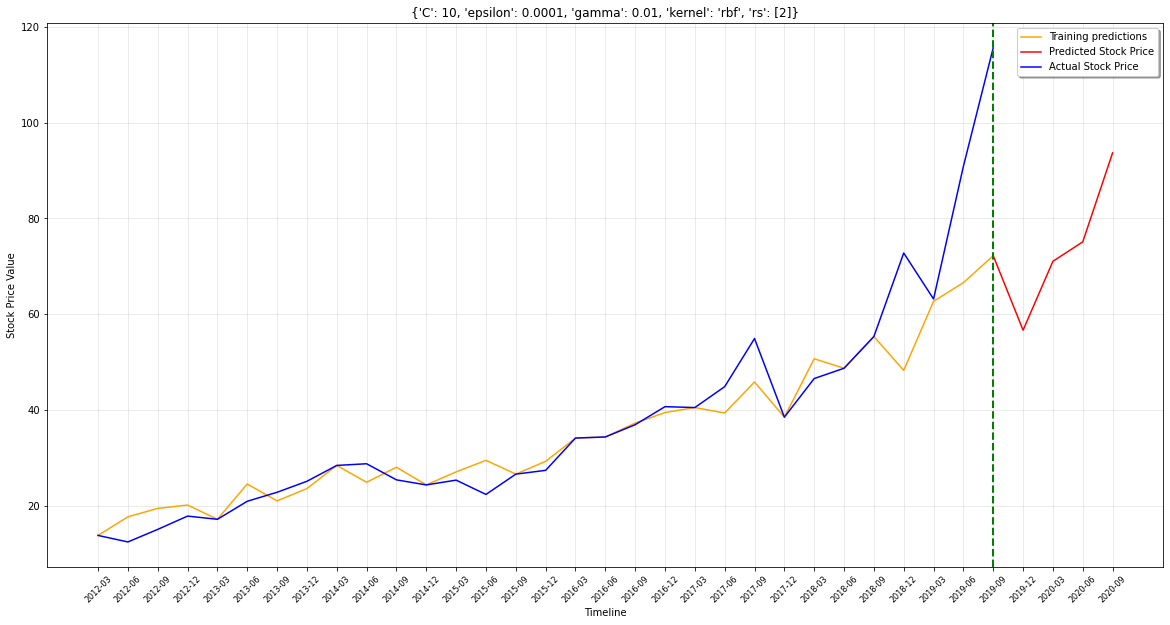

RMSE 23.85879258222442


In [90]:
params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

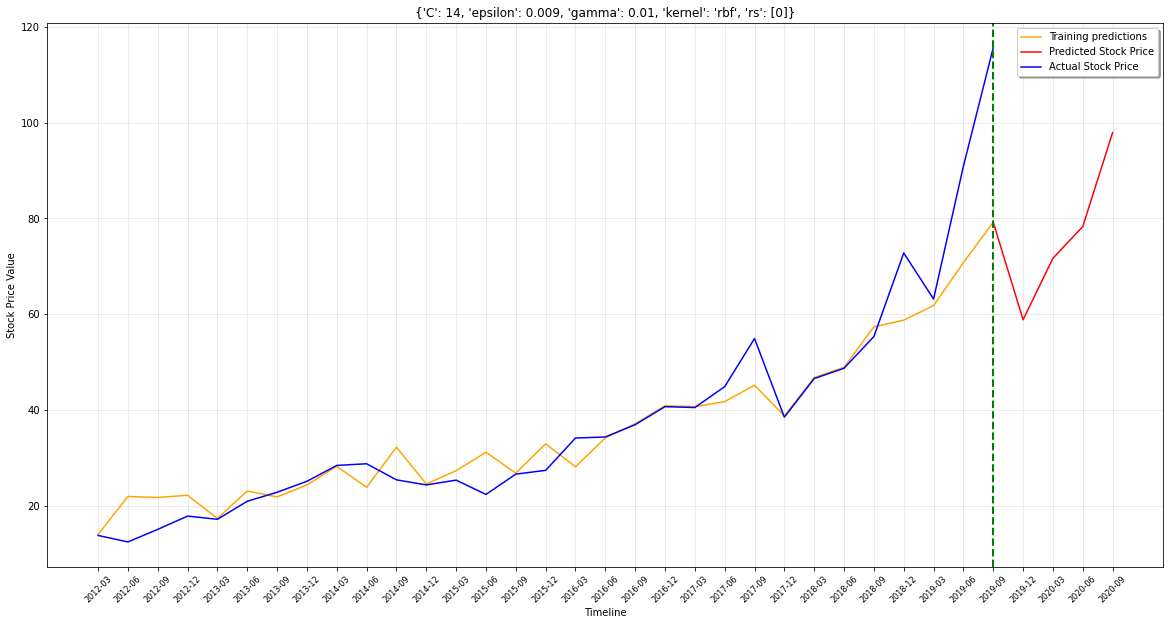

RMSE 24.78168509312852


In [85]:
params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

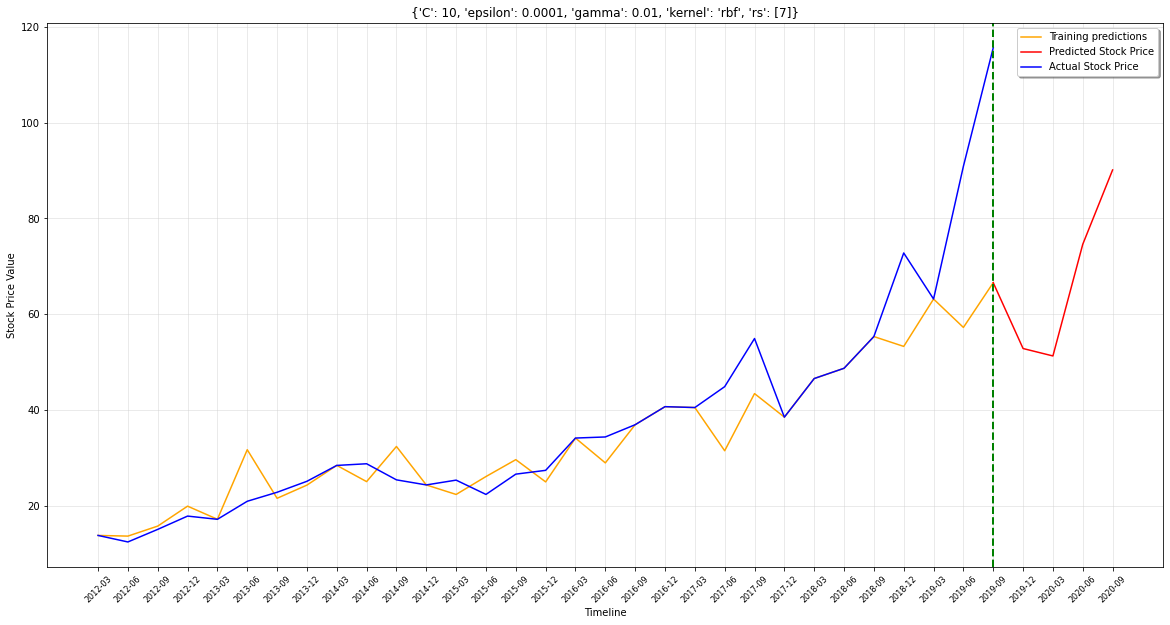

RMSE 23.094917465512307


In [61]:
params = str(Params)
# Chage on attributes and change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

In [50]:
params = "Params={'C': 18, 'epsilon': 0.02, 'gamma': 0.01, 'kernel': 'rbf', 'rs': [2]}"
# Chage on attributes and change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

RMSE 24.382786691876397


In [28]:
params = "Params:{'C': 22, 'epsilon': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'} rs=0"
# Chage on attributes and change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

RMSE 24.4558039032992


In [34]:
params = "Params:{'C': 16, 'epsilon': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'} rs=4"
# Chage on attributes and change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

RMSE 23.186090352647714


In [45]:
params = "Params:{'C': 16, 'epsilon': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'} rs=5"
# Chage on attributes and change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))

RMSE 22.955678332766585


In [38]:
params = "Params:{'C': 28, 'epsilon': 0.2, 'gamma': 0.001, 'kernel': 'rbf'} rs=6"
# Chage on attributes and change on PricePerShare
# Reduced attributes

# Plot parameters
START_DATE_FOR_PLOTTING = '2012-03'
START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(df.index[START_INDEX:-4], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(df.index[-5:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(df.index[START_INDEX:-4], df['Prediction'][START_INDEX:-4].values, color='b', label='Actual Stock Price')

plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED_TRAIN, squared=False))